In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Seguradora Mundo Car

## Contextualização

Na seguradora MundoCAR, no universo de sinistros de automóveis, alguns indicadores são os balizadores para as análises de eficiência operacional e qualidade. Você como membro do time de informações gerenciais, precisa elaborar estudos que apoiam as lideranças nas tomadas de decisão do negócio.

Usando as bases de dados, avaliar o cenário atual nos pilares de prazo, custos e oportunidades  por marca levando em consideração a Representatividade.

1. Estabeleça se existe alguma eficiência com o fornecimento de peças;
2. Faça uma análise de eficiência por canal de atendimento;
3. Faça uma projeção dos cenários para os próximos 6 meses;
4. Das categorias de veículos e montadoras, avalie o comportamento entre os períodos (20x21);

Montar uma apresentação executiva e dashboard de acompanhamento dos indicadores.

Obs: um sinistro pode gerar mais de uma vistoria
Obs2: cada vistoria possui um prazo para o agente avaliar as informações do orçamento e veículo

In [149]:
df = pd.read_csv('Base_Case_2.csv', delimiter=';')
df = df.sort_values(by='PERIODO')
df

,PERIODO,Quantidade,Montadora,Canal,Estado,Categoria,Custo Reparação,Vistoria no prazo,Vistoria fora do prazo,FLAG FORNECIDO,QTD_PECAS TOTAL,QTD_PCS_FORNECIDAS
0,2020/01,28,MARCA A,CANAL 1,BA,PASSEIO NACIONAL,375430.53,51,6,NAO,524.0,NaN
792,2020/01,3,MARCA D,CANAL 2,MA,VEICULO IMPORTADO,25213.30,4,0,NAO,63.0,NaN
791,2020/01,1,MARCA D,CANAL 2,MA,PICK UP E SUV,10803.90,1,0,NAO,16.0,NaN
790,2020/01,1,MARCA D,CANAL 2,MA,PASSEIO NACIONAL,16063.14,1,0,NAO,47.0,NaN
789,2020/01,1,MARCA D,CANAL 2,GO,PICK UP E SUV,2642.50,3,0,NAO,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21407,2021/06,18,MARCA B,CANAL 2,SP,PICK UP E SUV,188124.31,49,3,NAO,235.0,NaN
21406,2021/06,9,MARCA B,CANAL 2,SP,PASSEIO NACIONAL,32307.76,20,0,SIM,46.0,25.0
21405,2021/06,27,MARCA B,CANAL 2,SP,PASSEIO NACIONAL,190799.04,55,4,NAO,327.0,NaN
21414,2021/06,2,MARCA B,CANAL 4,DF,PASSEIO NACIONAL,35057.74,2,0,NAO,34.0,NaN


## Features Numéricas

In [150]:
df.describe().round(2)

,Quantidade,Custo Reparação,Vistoria no prazo,Vistoria fora do prazo,QTD_PECAS TOTAL,QTD_PCS_FORNECIDAS
count,22399.00,22399.00,22399.00,22399.00,22134.00,9482.00
mean,10.37,92812.85,24.56,0.93,143.02,86.31
std,36.92,306413.26,86.97,3.30,472.18,284.65
min,1.00,-50000.00,0.00,0.00,1.00,-50.00
25%,1.00,10003.23,3.00,0.00,15.00,8.00
50%,2.00,26717.48,6.00,0.00,40.00,22.00
75%,7.00,72269.16,17.00,1.00,106.00,62.00
max,940.00,7826233.12,2418.00,131.00,10671.00,6052.00


O custo de reparação, a quantidade de peças totais e a quantidade de peças fornecidas apresentam valores muito discrepantes: o que pode ser constatado pelo desvio padrão muito alto.

C:\Users\tefip\AppData\Local\Temp\ipykernel_14296\2798704435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='crest', annot=True);


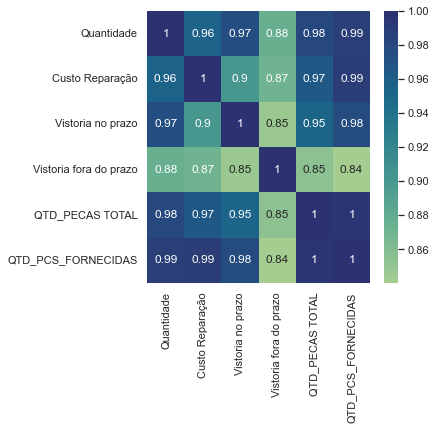

In [151]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(), cmap='crest', annot=True);

O mapa acima apenas confirma uma relação já constatada pela análise no SQL em que verificou-se que a vistoria feita no prazo implica em maior probabilidade de fornecimento de peças. 

## Distribuição da variável FLAG FORNECIDO

In [152]:
df['QTD_PCS_FORNECIDAS'].sum()/df['QTD_PECAS TOTAL'].sum()

0.2585270348131975

Em geral, a seguradora fornece 25% das peças utilizadas nos reparos.

In [153]:
df.groupby(['FLAG FORNECIDO'])['Quantidade'].sum()/df['Quantidade'].sum()

FLAG FORNECIDO
NAO    0.588021
SIM    0.411979
Name: Quantidade, dtype: float64

Por outro lado, em 40% dos sinistros há fornecimento de peças com desconto.

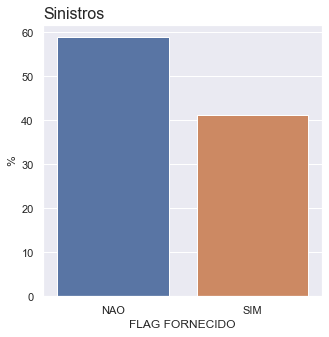

In [154]:

alvo_dist = df.groupby(['FLAG FORNECIDO'])['Quantidade'].sum()/df['Quantidade'].sum()

sns.barplot(x=alvo_dist.index, y=alvo_dist*100)

plt.xlabel('FLAG FORNECIDO')
plt.ylabel('%')
plt.title('Sinistros', loc='left', fontsize=16)
plt.show()

In [155]:
df_com_fornec = df[df['FLAG FORNECIDO']=='SIM']

df_com_fornec['QTD_PCS_FORNECIDAS'].sum()/df_com_fornec['QTD_PECAS TOTAL'].sum()

0.662832087040962

E nos casos em que há fornecimento de peças com desconto, estas representam 66% do total de peças utilizadas.

Como já havíamos visto pelo SQL, há mais flag_fornecido = Não e os valores proporcionais exatos foram descritos no SQL. 

## Analisando as variáveis categóricas em relação ao FLAG FORNECIDO: 

Vamos definir abaixo uma função que irá plotar a distribuição da variável Flag Fornecida dentro de algumas features:

- Montadora
- Estado
- Categoria
- Canal

In [156]:
def plot_class_dist_by_category(feature):
    class_count_by_cat = df.groupby(by=[feature, 'FLAG FORNECIDO'])['Quantidade'].sum()
    count_by_cat = df.groupby(by=feature)['Quantidade'].sum()
    
    class_dist_by_cat = (class_count_by_cat/count_by_cat*100).reset_index(name='%').sort_values(by='%', ascending=False)
    
    ax = sns.barplot(data=class_dist_by_cat, y=feature, x='%', hue='FLAG FORNECIDO', orient='h')
    
    # plt.xticks(range(0,101, 5))   #marcações no eixo x: de zero a 100 de 5 em 5 
    ax.set_title(f'FLAG distribution within {feature.title()}', loc='left', fontsize=16)
    
    return plt.show()

Agora a função a seguir nos irformará sobre a quantidade de valores dentro de cada categoria, de maneira que poderemos avaliar a quantidade em que a proporção de cada classe será montada.

In [157]:
def show_value_counts(feature):
    return df.groupby(feature)['Quantidade'].sum()

### Montadora

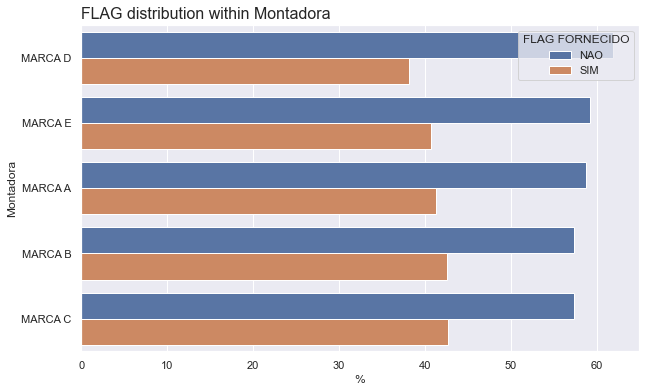

Montadora
MARCA A    66979
MARCA B    46882
MARCA C    33171
MARCA D    32174
MARCA E    53119
Name: Quantidade, dtype: int64

In [158]:
plt.figure(figsize = (10, 6))
plot_class_dist_by_category('Montadora')

show_value_counts('Montadora')

Acima vemos que a MARCA D é a única que não atinge 40% dos sinistros com fornecimento de peças.

### Estado

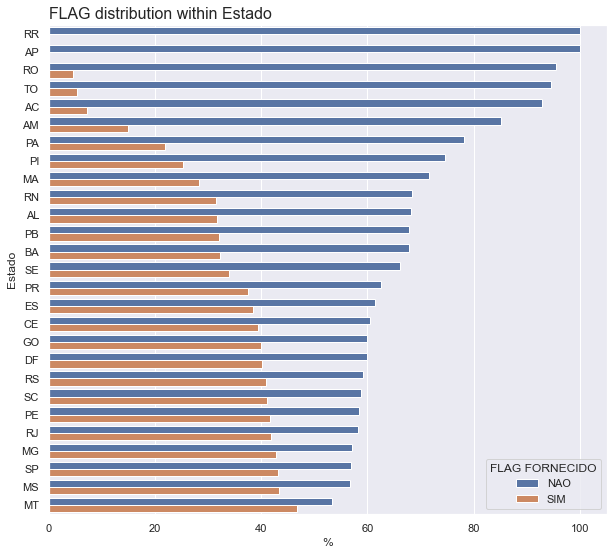

Estado
AC       126
AL      1389
AM       302
AP       104
BA      5703
CE      2275
DF      4129
ES      3410
GO      6743
MA      1052
MG     17842
MS      2101
MT      2226
PA      1320
PB      1512
PE      4165
PI       847
PR     11190
RJ     12074
RN      1415
RO       964
RR        84
RS     13512
SC      9820
SE      1487
SP    126144
TO       389
Name: Quantidade, dtype: int64

In [159]:
plt.figure(figsize = (10, 9))
plot_class_dist_by_category('Estado')

show_value_counts('Estado')

Acima vemos que as regiões:

- Norte e Nordeste apresentam as menores taxas de sinistros com fornecimento de peças. 
- Destaque para RR e AP que em todos os sinistros não tiveram peças fornecidas.
- Cento-Oeste, Sul, Sudeste e DF apresentam "equilíbrio" em relação ao fornecimento.
- Destaque para MT que apresenta maior equilíbrio em relação ao fornecimento de peças.

### Categoria

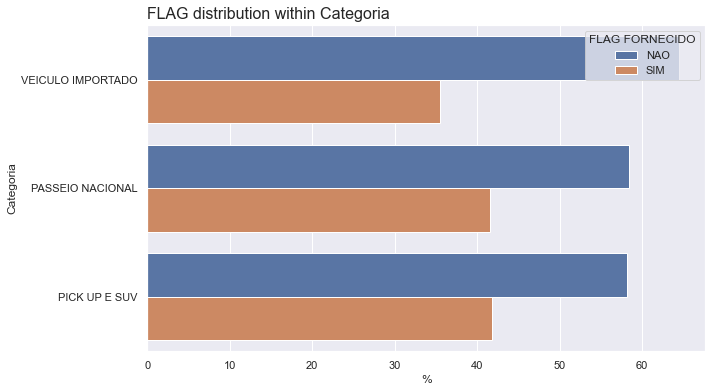

Categoria
PASSEIO NACIONAL     191536
PICK UP E SUV         26807
VEICULO IMPORTADO     13982
Name: Quantidade, dtype: int64

In [160]:
plt.figure(figsize = (10, 6))
plot_class_dist_by_category('Categoria')

show_value_counts('Categoria')

In [161]:
df[df['Categoria']=='VEICULO IMPORTADO']['Quantidade'].sum()/df.Quantidade.sum()*100

6.018293339072421

Note acima que veículos importados tem menos sinistros com peças fornecidas, porém representam apenas 6% do total de sinistros.

### Canal

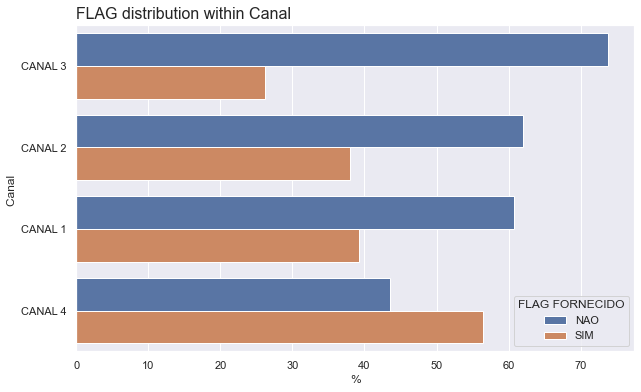

Canal 
CANAL 1    123524
CANAL 2     39883
CANAL 3     22396
CANAL 4     46522
Name: Quantidade, dtype: int64

In [162]:
plt.figure(figsize = (10, 6))
plot_class_dist_by_category('Canal ')
show_value_counts('Canal ')

O fornecimento de peças tem seu melhor resultado quando o sinistro é comunicado pelo canal 4, e tem seu pior resultaod quando é comunicado pelo canal 3.

## Analisando por períodos

# OBSERVAÇÃO:

Devido a dificuldades para ajustar os gráficos, refiz esta parat da análise (por períodos) no Excel. 

### Montadora

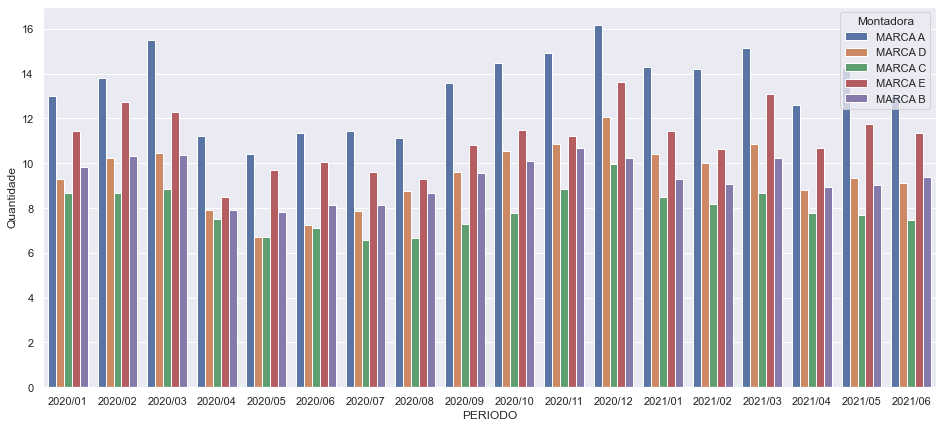

In [163]:
plt.figure(figsize = (16, 7))
sns.barplot(data=df, x="PERIODO", y="Quantidade", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período observado:

- a quantidade de sinistros da marca A é sempre maior, seguida da quantidade de sinistros da marca E.

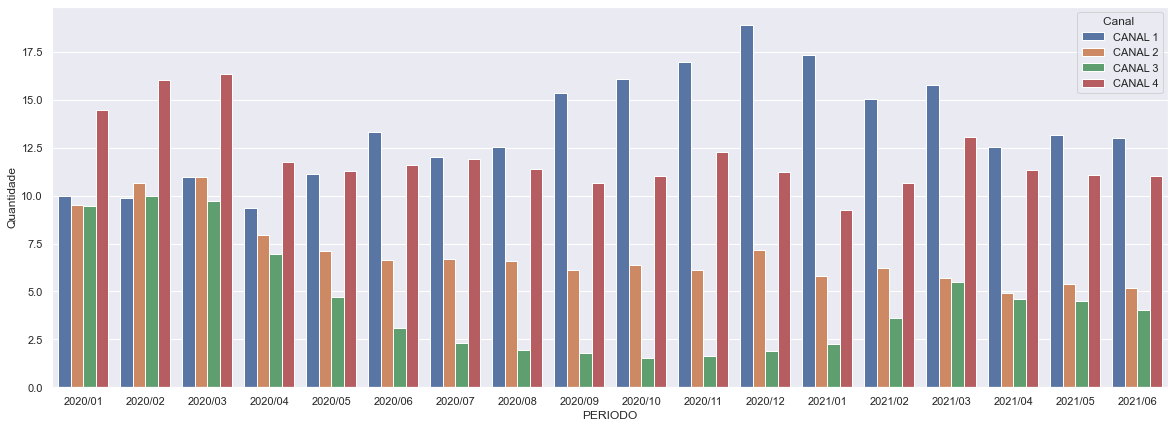

In [164]:
plt.figure(figsize = (20, 7))
sns.barplot(data=df, x="PERIODO", y="Quantidade", hue = "Canal ", errorbar=None, order=sorted(df.PERIODO.unique()), hue_order=sorted(df["Canal "].unique()));

Ao longo do período:

- no primeiro trimestre de 2020, o canal mais utilizado era o canal 4
- a partir do segundo trimestre de 2020, o canal 1 ganhou força e creceu até o final de 2020
- no primeiro trimestre de 2020, os canais 1, 2 e 3 eram utilizados em quantidade semelhantes
- em 2021 os canais 2 e 3 foram se equilibrando

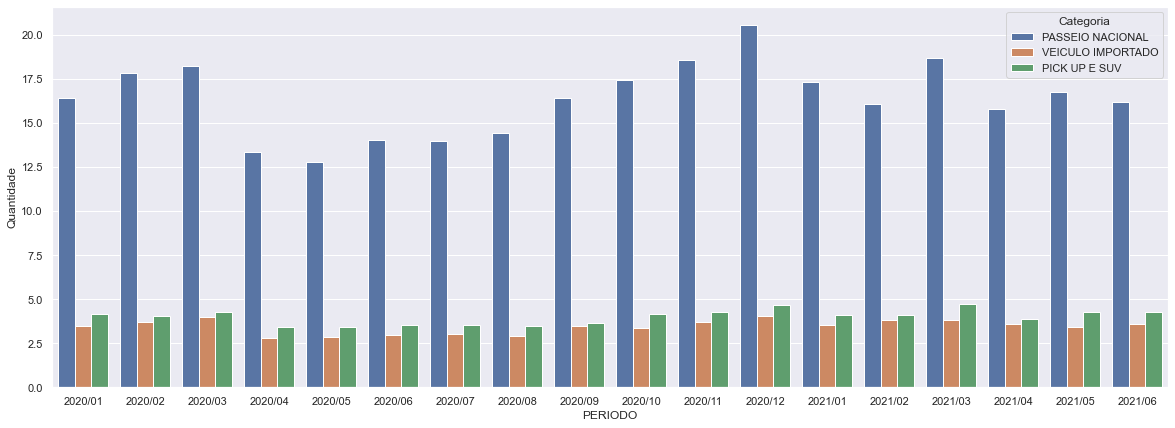

In [165]:
plt.figure(figsize = (20, 7))
sns.barplot(data=df, x="PERIODO", y="Quantidade", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período observado:

- a quantidade de sinistros de carros da categoria "PASSEIO NACIONAL" sempre foi muito maior, 4 vezes, aproximadamente.

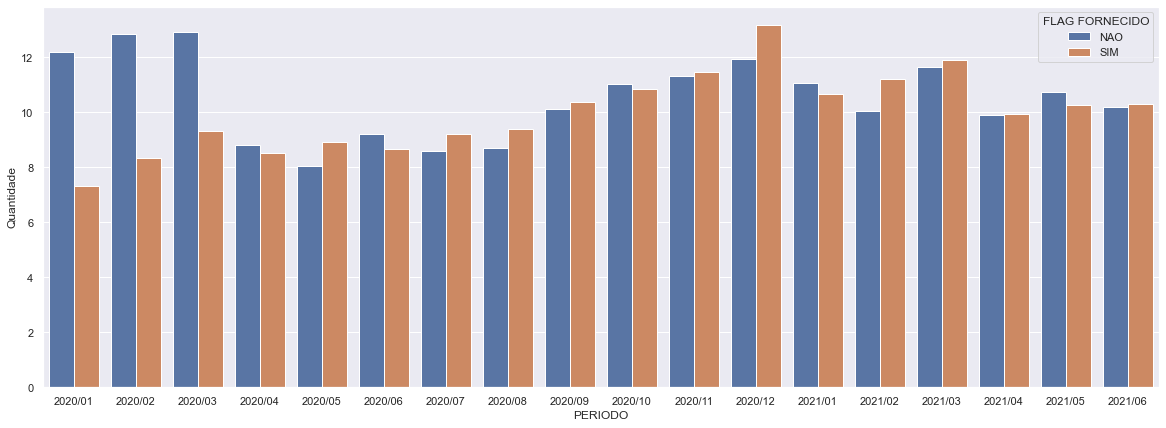

In [166]:
plt.figure(figsize = (20, 7))
sns.barplot(data=df, x="PERIODO", y="Quantidade", hue = "FLAG FORNECIDO", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período observado,

- haviam mais reparos sem peças fornecidas do que com peças fornecidas durante o primeiro trimestre de 2020.
- a partir do segundo trimestre de 2020, essa diferença de proporção diminuiu

## Analisando Período com Quantidade Total de Peças e: Montadora, Categoria e FLAG FORNECIDO

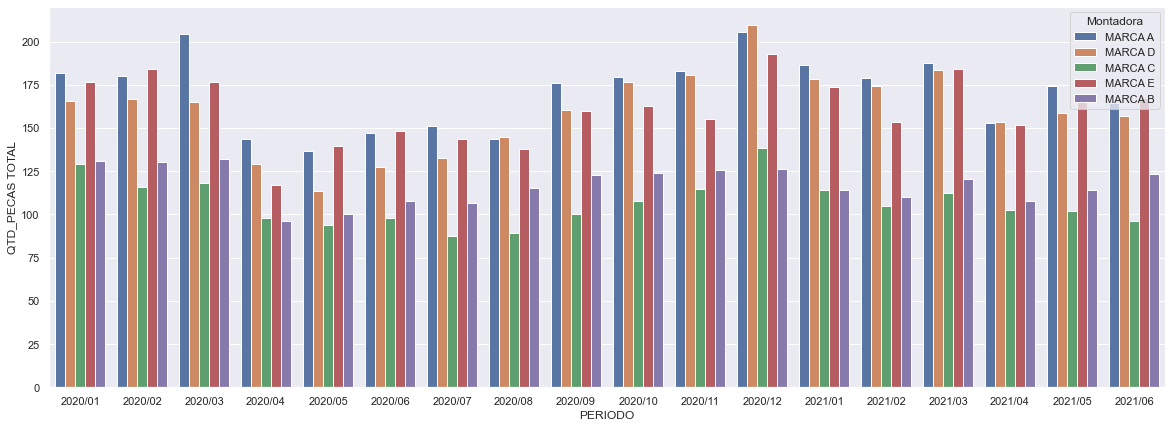

In [167]:
plt.figure(figsize = (20, 7))
sns.barplot(data=df, x="PERIODO", y="QTD_PECAS TOTAL", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

No período analisado:

- as marcas B e C tem menos peças utilizadas

- Há uma queda geral na quantidade de peças no segundo trimestre de 2020 e os níveis retornam aos valores iniciais no quarto trimestre do mesmo ano.

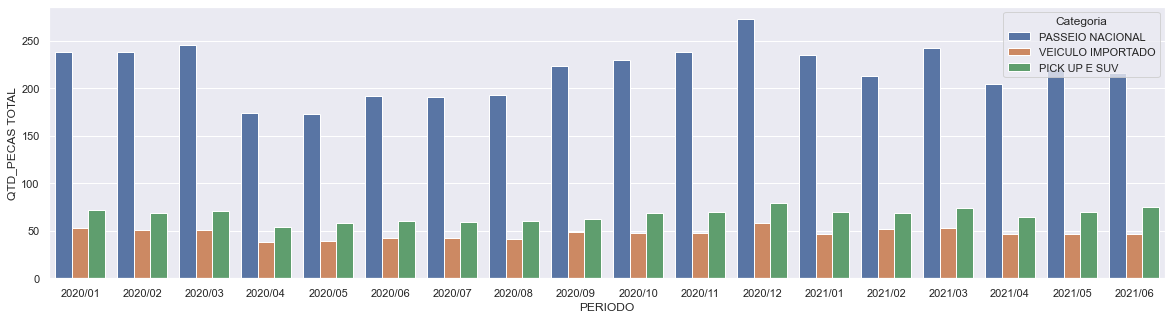

In [168]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="QTD_PECAS TOTAL", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao londo do período analisado:

- a categoria "PASSEIO NACIONAL" foi a que meis utilizou peças: cerca de 3 vezes mais em cada mês considerado no período
- Há uma queda geral na quantidade de peças no segundo trimestre de 2020 e os níveis retornam aos valores iniciais no quarto semestre do mesmo ano.      

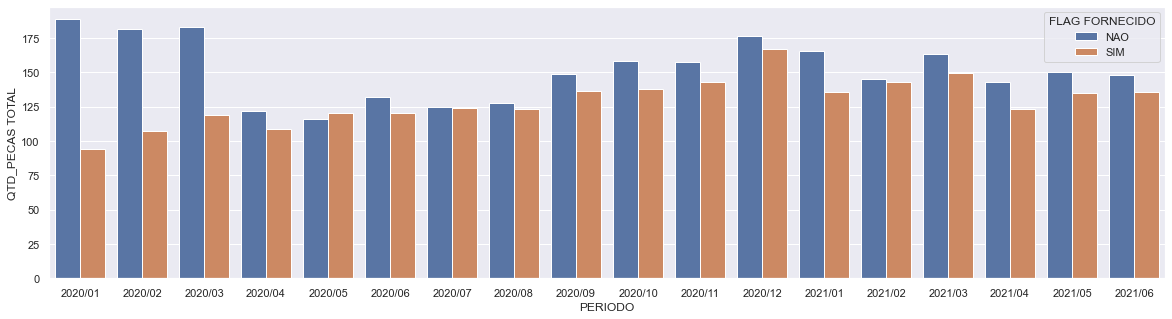

In [169]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="QTD_PECAS TOTAL", hue = "FLAG FORNECIDO", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o fornecimento de peças  era mais desproporcional no primeiro trimestre de 2020

## Analisando Período com Quantidade de Peças Fornecidas e: Montadora, Categoria

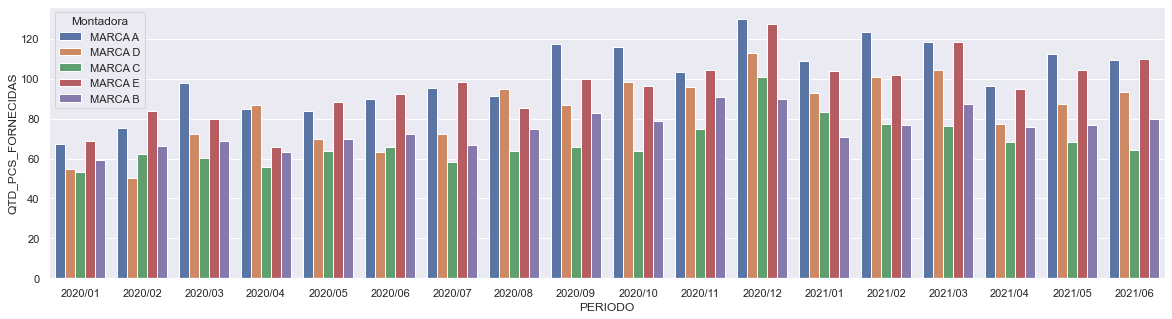

In [170]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="QTD_PCS_FORNECIDAS", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- a quantidade de peças fornecidas reflete a realidade da quantidade total de peças utilizadas.

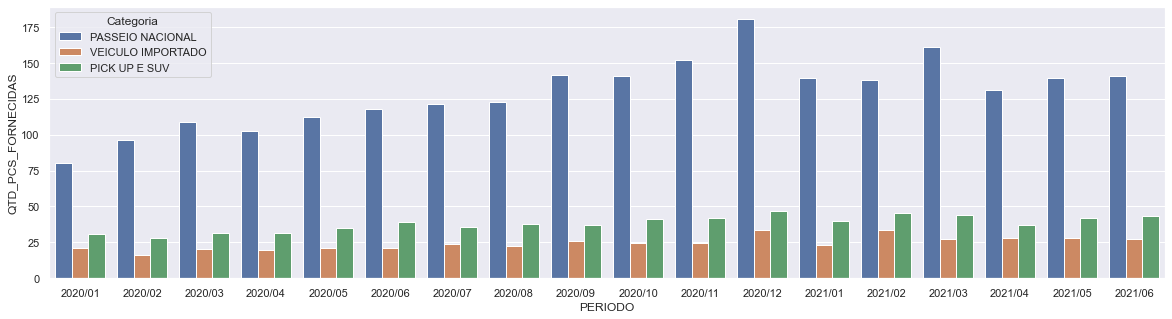

In [171]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="QTD_PCS_FORNECIDAS", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- a quantidade de peças fornecidas reflete a realidade da quantidade total de peças utilizadas.

## Analidando Período com Custo de Reparação e: Montadora, Categoria e FLAG FORNECIDO

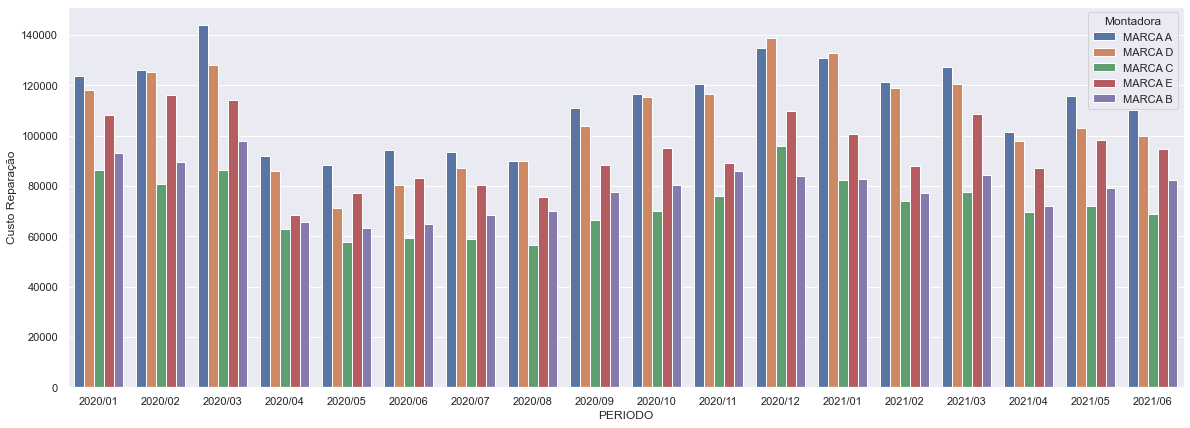

In [172]:
plt.figure(figsize = (20, 7))
sns.barplot(data=df, x="PERIODO", y="Custo Reparação", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o custo de reparação reflete a realidade de queda no segundo trimestre de 2020 observada na análise da quantidade total de peças utilizadas.
- o custo de reparação da marca D aumentou...

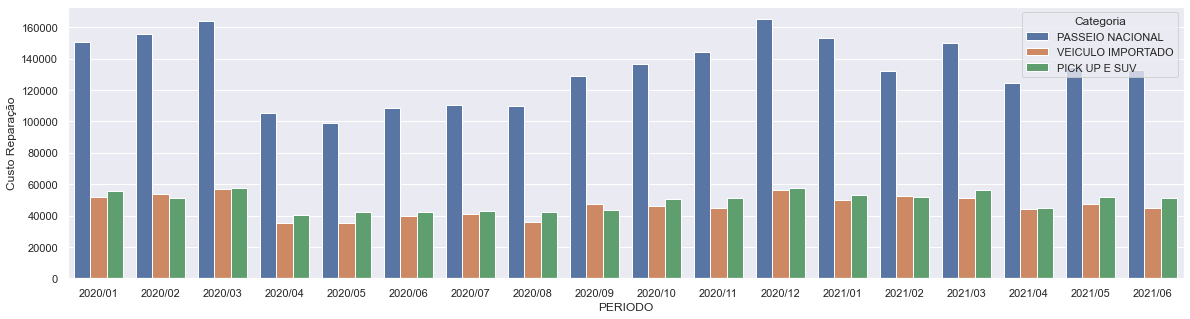

In [173]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Custo Reparação", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o carro da categoria PASSEIO NACIONAL apresentou custos 3 vezes maiores que as demais marcas, porém isso reflete a realidade da quantidade de peças utilizadas nos reparos (muito maiores para esta cat)

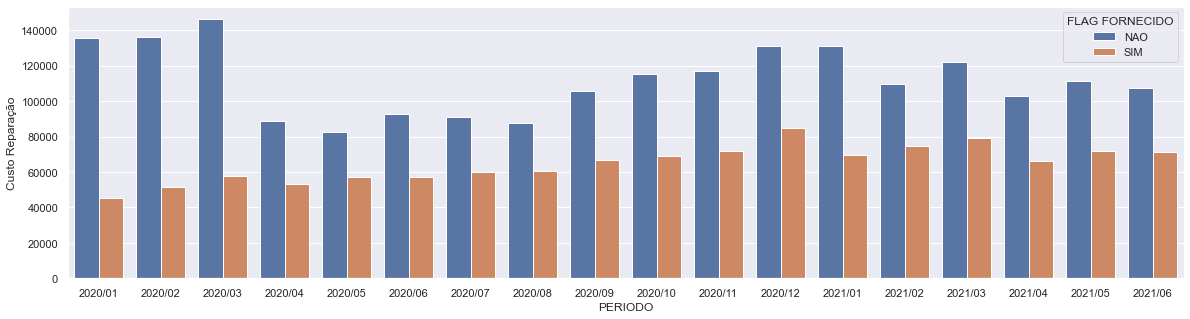

In [174]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Custo Reparação", hue = "FLAG FORNECIDO", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o primeiro trimestre apresenta uma maior desequilíbrio no fornecimento de peças. 

## Analidando Período com Vistoria no Prazo e: Montadora, Canal , Categoria e FLAG FORNECIDO

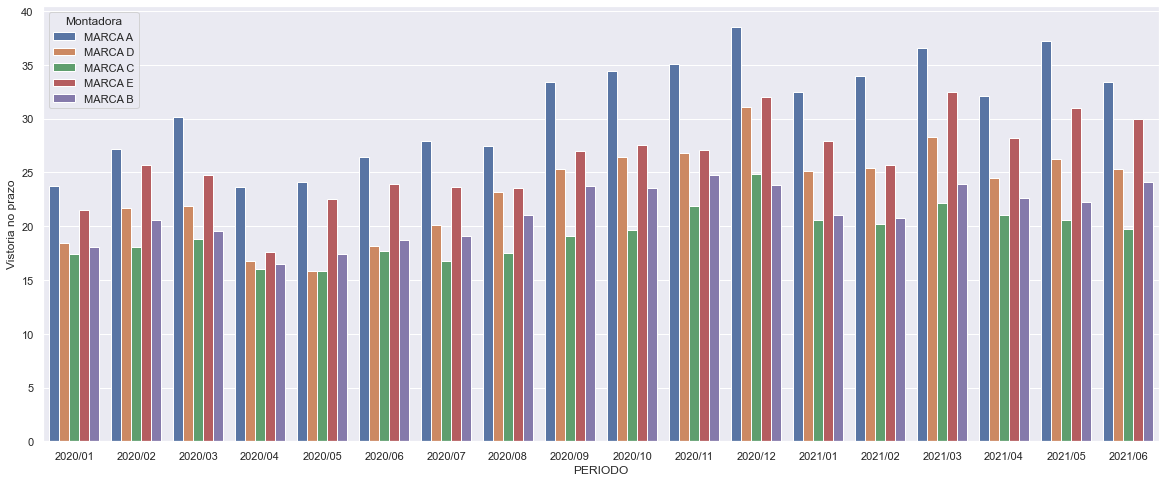

In [175]:
plt.figure(figsize = (20, 8))
sns.barplot(data=df, x="PERIODO", y="Vistoria no prazo", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o número de vistorias apresentou a mesma queda geral no segundo trimestre, mesma prevalencia da marca A e as marcas B e C sempre se mantém abaixo das demais

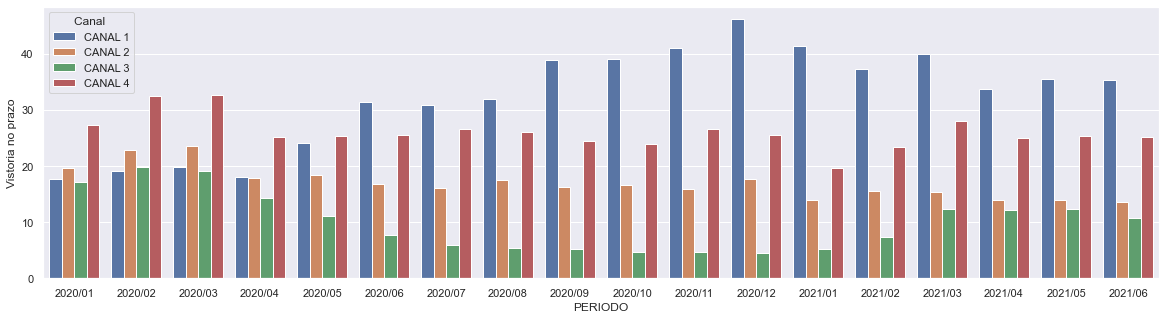

In [176]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria no prazo", hue = "Canal ", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- o número de vistorias no prazo pelo canal 1 aumentou muito
- o número de vistorias no prazo pelo canal 3 diminuiu muito

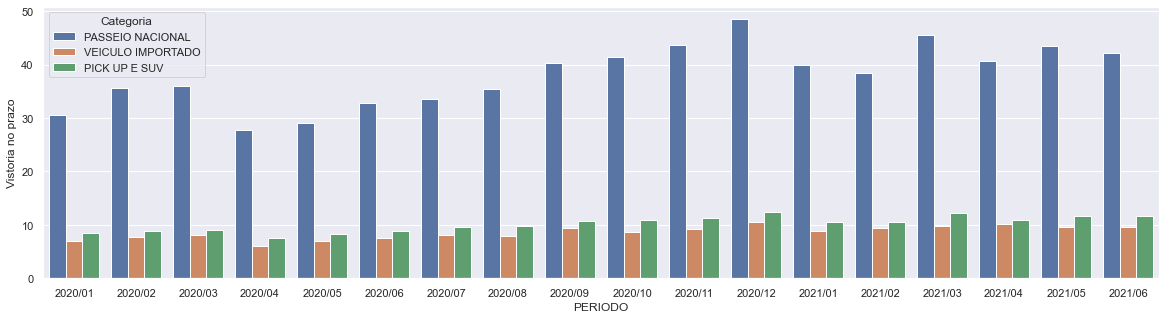

In [177]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria no prazo", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- a categora "PASSEIO NACIONAL" tem 3 vezes mais vistorias feitas no prazo que as demais categorias, em cada mês.  

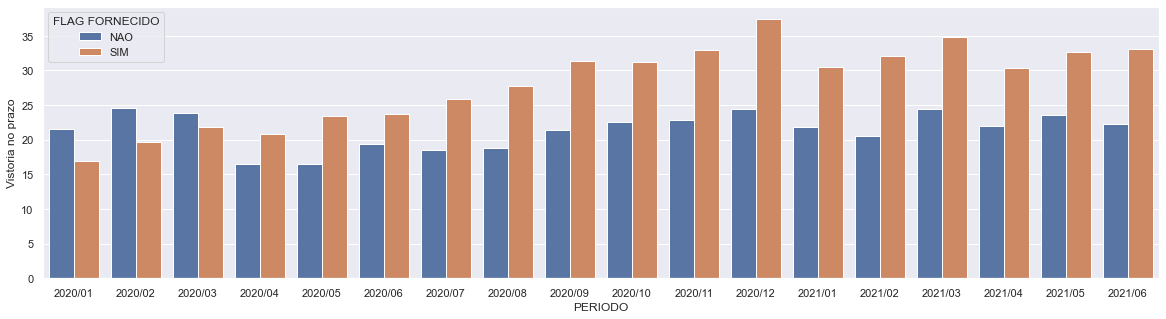

In [178]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria no prazo", hue = "FLAG FORNECIDO", errorbar=None, order=sorted(df.PERIODO.unique()));

Ao longo do período analisado:

- havia uma chance maior de não ter peças fornecidas no primeiro trismestre. Comportamento que se modificou a partir do segundo trimestre de 2020 e que foi se acentuando a chance de ter peças fornecidas quando a vistoria é feita no prazo. 

## Analidando Período com Vistoria Fora do Prazo e: Montadora, Canal , Categoria e FLAG FORNECIDO

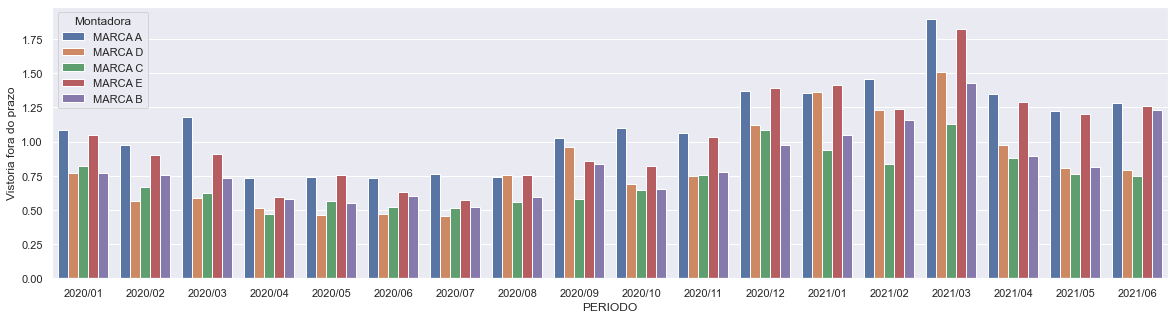

In [179]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria fora do prazo", hue = "Montadora", errorbar=None, order=sorted(df.PERIODO.unique()));

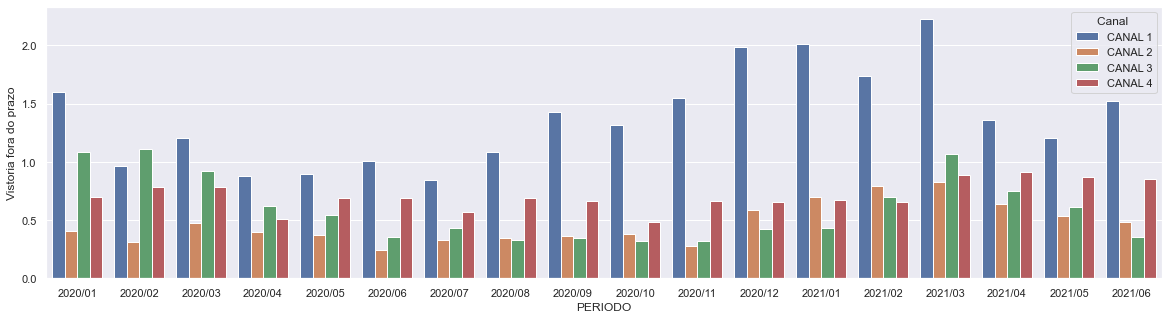

In [180]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria fora do prazo", hue = "Canal ", errorbar=None, order=sorted(df.PERIODO.unique()));

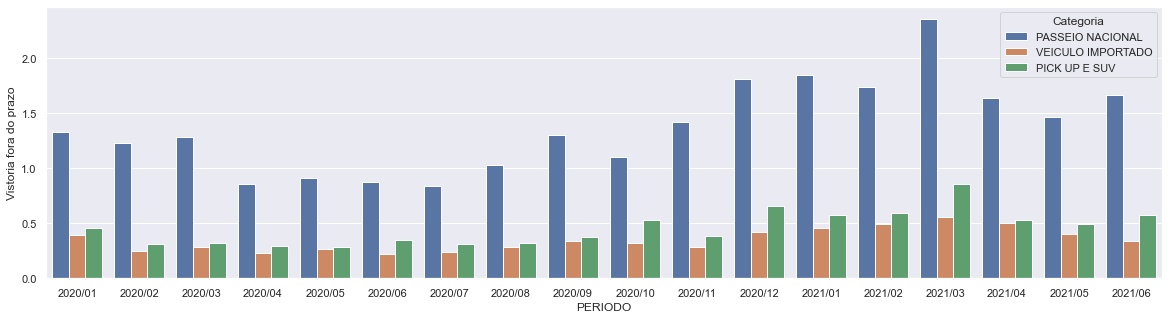

In [181]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria fora do prazo", hue = "Categoria", errorbar=None, order=sorted(df.PERIODO.unique()));

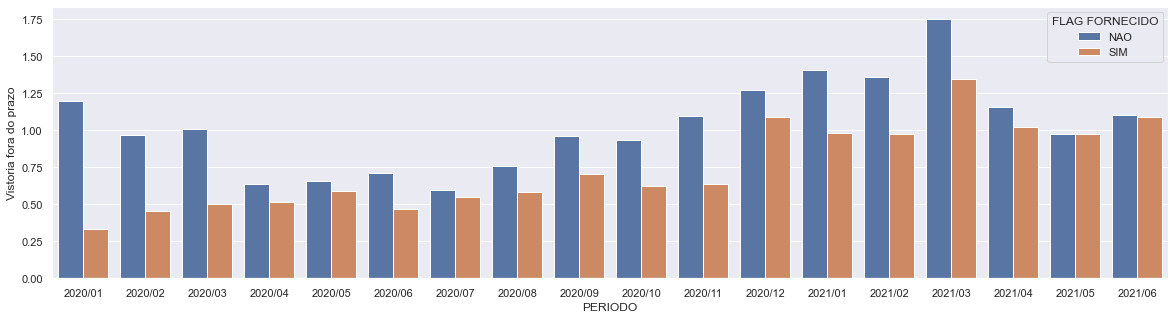

In [182]:
plt.figure(figsize = (20, 5))
sns.barplot(data=df, x="PERIODO", y="Vistoria fora do prazo", hue = "FLAG FORNECIDO", errorbar=None, order=sorted(df.PERIODO.unique()));